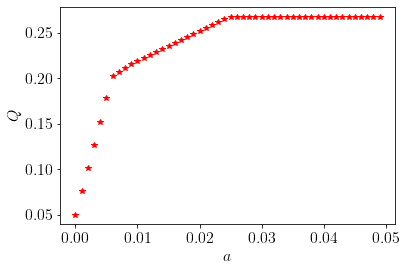

In [1]:
import matplotlib.pyplot as plt
from numpy import ones, diag, c_, zeros
from scipy.optimize import linprog



plt.rc('text',usetex=True); plt.rc('font',size=16)
c = [-0.05,-0.27,-0.19,-0.185,-0.185]
A = c_[zeros(4),diag([0.025,0.015,0.055,0.026])]
Aeq =[[1,1.01,1.02,1.045,1.065]]; beq = [1]
a=0; aa=[]; ss=[];

while a<0.05:
    b = ones(4)*a
    res = linprog(c,A,b,Aeq,beq)
    x = res.x; Q = -res.fun
    aa.append(a); ss.append(Q) #把最优值都保存起来
    a = a+0.001


plt.plot(aa,ss,'r*')
plt.xlabel('$a$'); plt.ylabel('$Q$',rotation=90)
plt.savefig('./线性规划/figure5_1_1.png',dpi=500); plt.show()

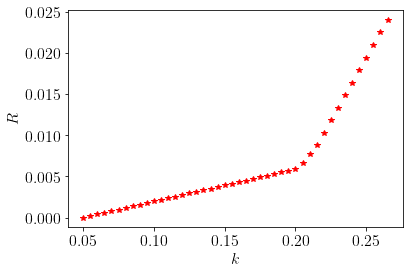

In [1]:
import pylab as plt
import numpy as np
import cvxpy as cp



plt.rc('text',usetex=True); plt.rc('font',size=16)
x=cp.Variable(6,pos=True)
obj=cp.Minimize(x[5])
a1=np.array([0.025, 0.015, 0.055, 0.026])
a2=np.array([0.05, 0.27, 0.19, 0.185, 0.185])
a3=np.array([1, 1.01, 1.02, 1.045, 1.065])
k=0.05; kk=[]; ss=[]

while k<0.27:
    con=[cp.multiply(a1,x[1:5])-x[5]<=0,
         a2@x[:-1]>=k, a3@x[:-1]==1]
    prob=cp.Problem(obj,con)
    prob.solve(solver='GLPK_MI')
    kk.append(k); ss.append(prob.value)
    k=k+0.005


plt.plot(kk,ss,'r*')
plt.xlabel('$k$'); plt.ylabel('$R$',rotation=90)
plt.savefig('./线性规划/figure5_1_2.png',dpi=500); plt.show()

In [2]:
import pylab as plt
import numpy as np
import cvxpy as cp



#plt.rc('text',usetex=True); plt.rc('font',size=16)
x=cp.Variable(6,pos=True)
obj=cp.Minimize(x[5])
a1=np.array([0.025, 0.015, 0.055, 0.026])
a2=np.array([0.05, 0.27, 0.19, 0.185, 0.185])
a3=np.array([1, 1.01, 1.02, 1.045, 1.065])
k=0.21; kk=[]; ss=[]
con=[cp.multiply(a1,x[1:5])-x[5]<=0,
    a2@x[:-1]>=0.21, a3@x[:-1]==1]
prob=cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print(x.value,'\n'); print(prob.value)

[-0.          0.30887428  0.51479046  0.1403974   0.01524453  0.00772186] 

0.007721856950851832


In [3]:
from scipy.optimize import linprog



c = [-1, 4]; A = [[-3, 1], [1, 2]]
b = [6, 4]; bound=((None,None),(-3,None))
res=linprog(c,A,b,None,None,bound)
print("目标函数的最小值：",res.fun)
print("最优解为：",res.x)

目标函数的最小值： -21.99999984082494
最优解为： [ 9.99999989 -2.99999999]


In [4]:
from scipy.optimize import linprog




c=[-1, 2, 3]; A = [[-2, 1, 1], [3, -1, -2]]
b=[[9], [-4]]; Aeq=[[4, -2, -1]]; beq=[-6]
LB=[-10, 0, None];
UB=[None]*len(c)  #生成3个None的列表
bound=tuple(zip(LB, UB))  #生成决策向量界限的元组
res=linprog(c,A,b,Aeq,beq,bound)
print("目标函数的最小值：",res.fun)
print("最优解为：",res.x)

目标函数的最小值： 0.40000000065269975
最优解为： [-1.60000000e+00  8.29674988e-11 -4.00000000e-01]


In [5]:
from scipy.optimize import linprog
import numpy as np


c=np.array([1, -2, -3])  #为了下面取相反数，这里使用数组
A =[[-2, 1, 1], [3, -1, -2]]
b=[[9], [-4]]; Aeq=[[4, -2, -1]]; beq=[-6]
LB=[-10, 0, None];
UB=[None]*len(c)  #生成3个None的列表
bound=tuple(zip(LB, UB))  #生成决策向量界限的元组
res=linprog(-c,A,b,Aeq,beq,bound)
print("目标函数的最小值：",res.fun)
print("最优解为：",res.x)

目标函数的最小值： 0.40000000065269975
最优解为： [-1.60000000e+00  8.29674988e-11 -4.00000000e-01]


In [6]:
from scipy.optimize import linprog




c=[110, 120, 130, 110, 115,-150]    #目标向量
A =[[1,1,0,0,0, 0],[0,0,1,1,1,0],[8.8,6.1,2.0,4.2,5.0,-6],[-8.8,-6.1,-2.0,-4.2,-5.0,3]]
b=[[200],[250],[0],[0]]; Aeq=[[1,1,1,1,1,-1]]; beq=[0]
res=linprog(c,A,b,Aeq,beq)
print("目标函数的最小值：",res.fun)
print("最优解为：",res.x)

目标函数的最小值： -17592.592317631676
最优解为： [1.59259257e+02 4.07407403e+01 8.86007774e-09 2.49999996e+02
 2.64755824e-07 4.49999993e+02]


In [7]:
import numpy as np
from cvxopt import matrix, solvers



c=matrix([-4.,-5]); A=matrix([[2.,1],[1,2],[-1,0],[0,-1]]).T
b=matrix([3.,3,0,0]); sol=solvers.lp(c,A,b)
print("最优解为：\n",sol['x'])
print("最优值为：",sol['primal objective'])

     pcost       dcost       gap    pres   dres   k/t
 0: -8.1000e+00 -1.8300e+01  4e+00  0e+00  8e-01  1e+00
 1: -8.8055e+00 -9.4357e+00  2e-01  2e-16  4e-02  3e-02
 2: -8.9981e+00 -9.0049e+00  2e-03  3e-16  5e-04  4e-04
 3: -9.0000e+00 -9.0000e+00  2e-05  9e-17  5e-06  4e-06
 4: -9.0000e+00 -9.0000e+00  2e-07  9e-17  5e-08  4e-08
Optimal solution found.
最优解为：
 [ 1.00e+00]
[ 1.00e+00]

最优值为： -8.99999981140672


In [8]:
import numpy
from cvxopt import matrix, solvers



c=matrix([2.,1]); A=matrix([[-1.,1],[-1,-1],[1,-2],[0,-1]]).T
b=matrix([1.,-2,4,0]); Aeq=matrix([1.,2],(1,2)) #Aeq为行向量
beq=matrix(3.5); sol=solvers.lp(c,A,b,Aeq,beq)
print("最优解为：\n",sol['x'])
print("最优值为：",sol['primal objective'])

     pcost       dcost       gap    pres   dres   k/t
 0:  5.5556e+00  1.2222e+00  1e+01  0e+00  2e+00  1e+00
 1:  4.6038e+00  3.7995e+00  2e+00  2e-16  4e-01  2e-01
 2:  2.5229e+00  2.4639e+00  2e-01  3e-16  4e-02  4e-02
 3:  2.5002e+00  2.4997e+00  2e-03  4e-16  4e-04  4e-04
 4:  2.5000e+00  2.5000e+00  2e-05  6e-17  4e-06  4e-06
 5:  2.5000e+00  2.5000e+00  2e-07  7e-16  4e-08  4e-08
Optimal solution found.
最优解为：
 [ 5.00e-01]
[ 1.50e+00]

最优值为： 2.500000024611048


In [9]:
import cvxpy as cp
import numpy as np
import pandas as pd



d1=pd.read_excel("./数据集/Pdata5_6.xlsx",header=None)
d2=d1.values; c=d2[:-1,:-1]
d=d2[-1,:-1].reshape(1,-1); e=d2[:-1,-1].reshape(-1,1)
x=cp.Variable((6,8))
obj=cp.Minimize(cp.sum(cp.multiply(c,x)))  #构造目标函数
con=[cp.sum(x,axis=1,keepdims=True)<=e,
cp.sum(x,axis=0,keepdims=True)==d,x>=0]  #构造约束条件
prob=cp.Problem(obj,con)  #构造模型
prob.solve(solver='GLPK_MI',verbose =True)    #求解模型
print("最优值为：",prob.value)
print("最优解为：\n",x.value)

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Aug 12 06:18:23 PM: Your problem has 48 variables, 3 constraints, and 0 parameters.
(CVXPY) Aug 12 06:18:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 12 06:18:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 12 06:18:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 12 06:18:23 PM: Compiling problem (target solver=GLPK_MI).
(CVXPY) Aug 12 06:18:23 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing

In [10]:
from scipy.optimize import linprog



c=[-72, -64]    #目标向量
A =[[1, 1],[12, 8]]; b=[[50],[480]]
bound=((0,100/3.0),(0,None))
res=linprog(c,A,b,None,None,bound,method='simplex',options={"disp": True})
print("求解结果如下：",res)

Optimization terminated successfully.
         Current function value: -3360.000000
         Iterations: 4
求解结果如下：      con: array([], dtype=float64)
     fun: -3360.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([20., 30.])


In [11]:
from scipy.optimize import linprog



c=[-90, -64]    #目标向量
A =[[1, 1],[12, 8]]; b=[[50],[480]]
bound=((0,100/3.0),(0,None))
res=linprog(c,A,b,None,None,bound,method='simplex',options={"disp": True})
print("求解结果如下：",res)

Optimization terminated successfully.
         Current function value: -3720.000000
         Iterations: 4
求解结果如下：      con: array([], dtype=float64)
     fun: -3720.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([20., 30.])
